## Life Expectancy Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# Load the CSV file into a DataFrame
file_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\KULU_Doc\Projects\CAN\life_expectancy.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Entity,Code,Year,LifeExpectancy
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [110]:
print(df.shape)
print(df.info())

(20755, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          20755 non-null  object 
 1   Code            19061 non-null  object 
 2   Year            20755 non-null  int64  
 3   LifeExpectancy  20755 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 648.7+ KB
None


In [111]:
print(df["Entity"].nunique())
print(df["Year"].nunique())


261
313


In [129]:
df_pivot=df.pivot(index="Year",columns="Entity",values="LifeExpectancy")
df_pivot.head()

Entity,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Year'>

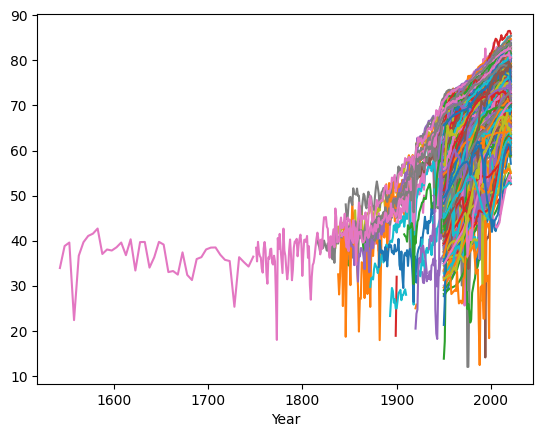

In [130]:
df_pivot.plot(legend=False)

What we can observe
- from this is Only two countries has data between late 1960 and around 1850. 
- How we can now which countries are they?
- Most Probably those who have less null values after pivoting,right?  Good let's check.


In [131]:
df_pivot.isna().sum().sort_values().head()

Entity
Sweden             42
United Kingdom     73
France            107
Denmark           125
Iceland           129
dtype: int64

<Axes: xlabel='Year'>

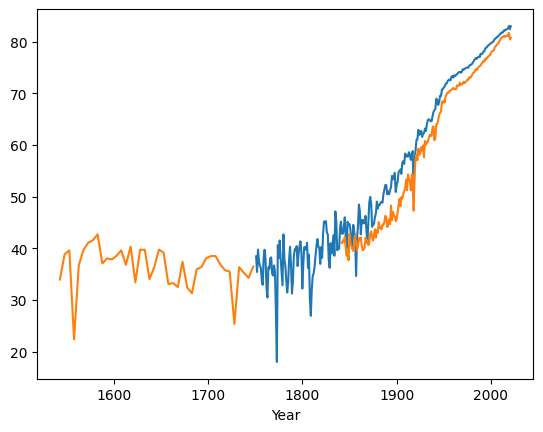

In [132]:
df_pivot["Sweden"].plot()
df_pivot["United Kingdom"].plot()

Yes! Good.

- And Most countries has data starting from 1900s.
- Now Let's check which country has less data in our data set.


In [133]:
result = df.groupby("Entity").count().sum(axis=1).sort_values()
df_result=pd.DataFrame(result)
df_result.reset_index(inplace=True)
df_result.columns=["Country","count"]
df_result.head()


,Country,count
0,USSR,6
1,Northern Ireland,56
2,Northern America,144
3,Small Island Developing States (SIDS),144
4,More developed regions,144


USSR fellowed by Northern Ireland, Northern America....has very few data. Especially USSR.

In [134]:
df_result.describe()

,count
count,261.000000
mean,232.072797
std,81.927163
min,6.000000
25%,216.000000
50%,216.000000
75%,225.000000
max,813.000000


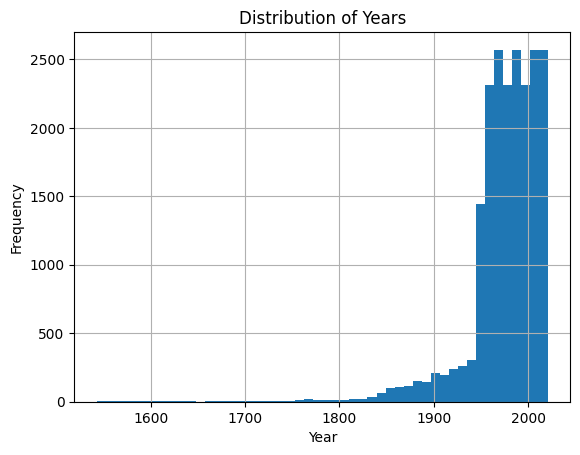

In [135]:
import matplotlib.pyplot as plt

df["Year"].hist(bins=50)  # Adjust bins as needed
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Years")
plt.show()

In [ ]:
# Define bins for years
bins = np.arange(1900, 2021, 5)  # Adjust bin size as needed

# Get histogram values
counts, bin_edges = np.histogram(df["Year"], bins=bins)

# Find the first bin where frequency significantly increases
threshold = max(counts) * 0.2  # Example: 10% of max frequency as a threshold
start_year = bin_edges[np.where(counts > threshold)[0][0]]

print(f"Most frequent data starts around: {start_year}")


Most frequent data starts around: 1950


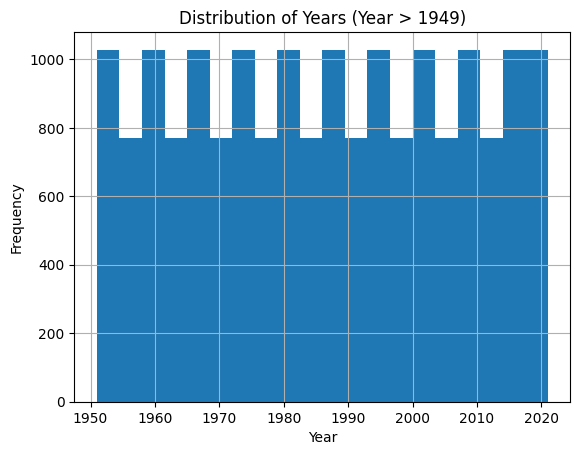

In [ ]:

# Filter the dataframe for Year > 1940
df_ctr_f = df[df["Year"] > 1950]

# Plot histogram
df_ctr_f["Year"].hist(bins=20)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Years (Year > 1949)")
plt.show()


ehm Good.
- Now it is okay to comparison. 

Exmaple

In [139]:
countries = ["United Kingdom", "Namibia", "South Africa", "Nigeria", "Kenya"]
df_ctr_f = df.query('Entity == @countries & Year > 1949').pivot(index='Year', columns='Entity', values='LifeExpectancy')
df_ctr_f.head()

Entity,Kenya,Namibia,Nigeria,South Africa,United Kingdom
Year,,,,,
1950,38.9024,41.5307,35.8097,43.4715,68.6310
1951,39.0919,41.7739,35.9247,44.1756,68.2352
1952,38.9473,42.3996,36.0935,45.0614,69.5176
1953,40.3157,43.0004,36.3435,46.0056,69.7967
1954,41.6892,43.6840,36.4453,47.1206,70.1646


Text(0.5, 1.0, 'Life Expectancy in Selected Countries (Year > 1949)')

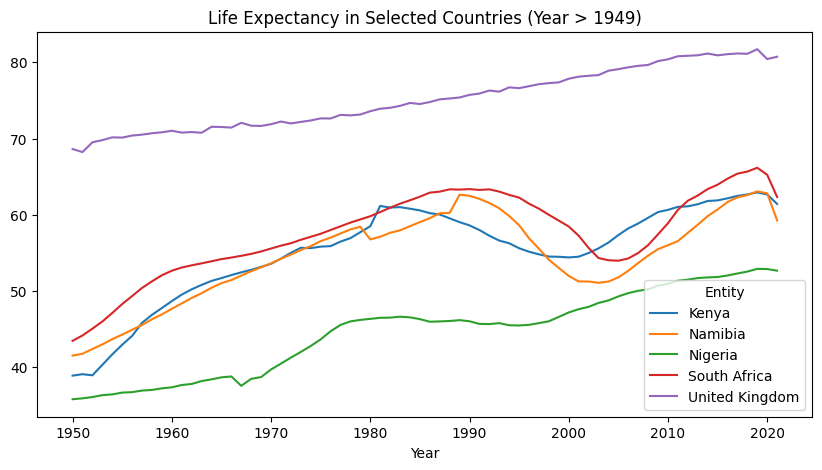

In [140]:
df_ctr_f.plot(legend=True, figsize=(10, 5))
plt.title("Life Expectancy in Selected Countries (Year > 1949)")

##### Adding Reference lines

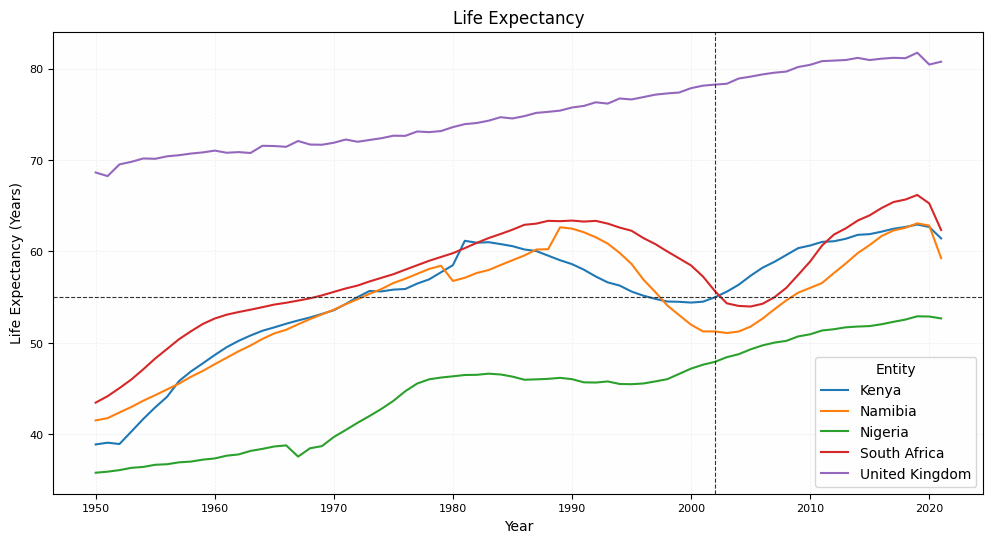

In [141]:
df_ctr_f = df_ctr_f.plot(title="Life Expectancy", ylabel="Life Expectancy (Years)", fontsize=8, figsize=(12, 6))
df_ctr_f.grid(color='#eee', linestyle='--', linewidth=0.5)
df_ctr_f.set_facecolor('#fefefe')
df_ctr_f.axvline(x=2002, color='#333', linestyle='--', linewidth=0.8)
df_ctr_f.axhline(y=55, color='#333', linestyle='--', linewidth=0.8)

#### Summary of Life Expectancy Trends:
Kenya, Namibia and South Africa.

- 📉 2000–2005: Life expectancy declined due to HIV/AIDS.
- 📈 2005–2015: Recovery due to ART and healthcare improvements.
- 📊 2015–2020: Gradual growth, with a temporary COVID-19 decline in 2020.

In [125]:
df["LifeExpectancy"].describe()

count    20755.000000
mean        61.617992
std         12.917682
min         11.995100
25%         52.185850
50%         64.060000
75%         71.822250
max         86.542400
Name: LifeExpectancy, dtype: float64

In [ ]:
mean_life_expectancy = df.groupby("Entity")["LifeExpectancy"].mean().sort_values()
print(mean_life_expectancy.head(10))


Entity
USSR            32.700000
South Sudan     38.033107
Mali            43.076225
Sierra Leone    43.208040
Niger           44.237465
East Timor      44.307192
Chad            44.333856
Nigeria         44.655007
Malawi          44.684810
Angola          45.086359
Name: LifeExpectancy, dtype: float64


In [144]:
print(mean_life_expectancy.tail(10))

Entity
Faroe Islands    74.684574
Gibraltar        75.039728
New Zealand      75.130423
Jersey           75.202542
Hong Kong        75.331715
Israel           75.501712
Guernsey         76.717325
San Marino       76.879115
Andorra          77.045154
Monaco           77.251549
Name: LifeExpectancy, dtype: float64


In [154]:
# Get the entities with the lowest life expectancy
lowest_entities = mean_life_expectancy.head(5).index.tolist()
# Get the entities with the lowest life expectancy
highest_entities = mean_life_expectancy.tail(5).index.tolist()
# Merge the lowest and highest life expectancy entities
merged_entities = lowest_entities + highest_entities

# Print the merged list
print(merged_entities)


['USSR', 'South Sudan', 'Mali', 'Sierra Leone', 'Niger', 'Israel', 'Guernsey', 'San Marino', 'Andorra', 'Monaco']


In [155]:

df_ctr_f2 = df.query('Entity == @merged_entities & Year > 1949').pivot(index='Year', columns='Entity', values='LifeExpectancy')
df_ctr_f2.head()

Entity,Andorra,Guernsey,Israel,Mali,Monaco,Niger,San Marino,Sierra Leone,South Sudan
Year,,,,,,,,,
1950,64.5863,70.2148,68.1852,28.1697,66.4679,36.2515,68.7406,29.5691,31.2475
1951,64.2338,70.2679,68.0504,28.2909,66.6067,36.2134,68.9538,29.8212,31.5457
1952,67.4204,72.2794,68.0466,28.5269,67.1183,36.1709,69.0649,30.3494,31.9503
1953,68.2467,72.3799,68.1303,28.7642,69.7567,36.1330,69.2603,30.8742,32.4833
1954,69.4804,71.9688,68.3024,28.9709,70.4533,36.1863,69.4177,31.3085,32.9317


Text(0.5, 1.0, 'Life Expectancy in Selected Countries (Year > 1949)')

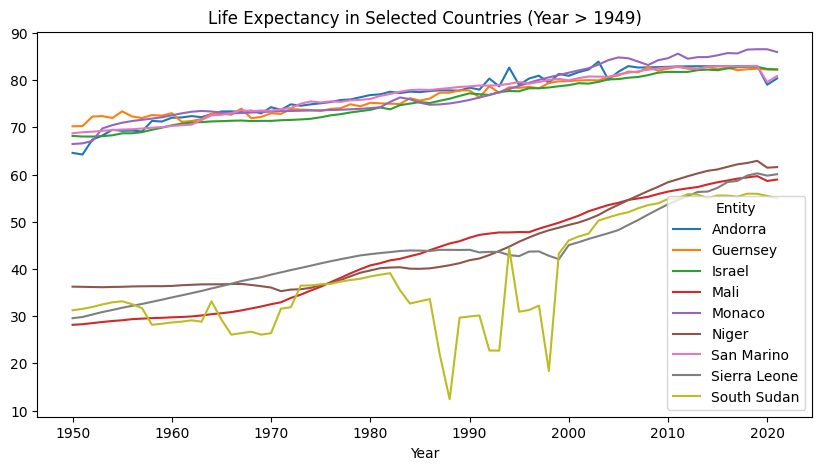

In [156]:
df_ctr_f2.plot(legend=True, figsize=(10, 5))
plt.title("Life Expectancy in Selected Countries (Year > 1949)")

#### South Sudan

Text(0.5, 1.0, 'Life Expectancy in South Sudan (Year > 1949)')

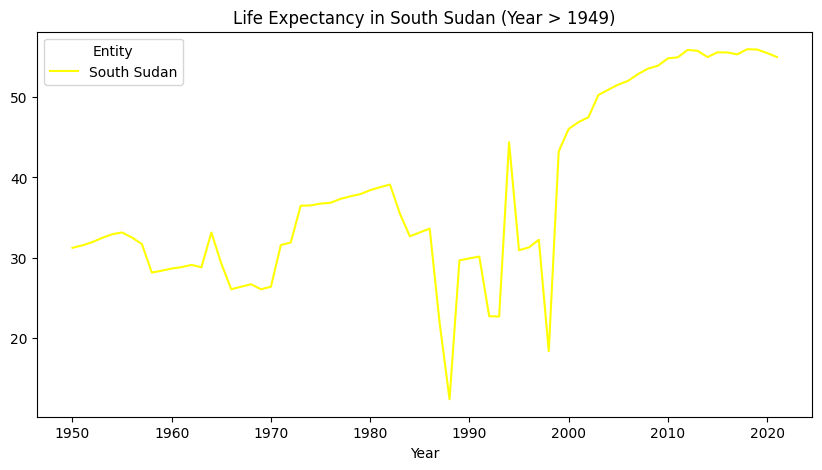

In [159]:
ss=['South Sudan']
df_ctr_ss = df.query('Entity == @ss & Year > 1949').pivot(index='Year', columns='Entity', values='LifeExpectancy')
df_ctr_ss.plot(legend=True, figsize=(10, 5),color="yellow")
plt.title("Life Expectancy in South Sudan (Year > 1949)") 


The graph shows a sharp decline in life expectancy in South Sudan around the late 1980s and early 1990s. This drop is likely due to the intensification of the Second Sudanese Civil War, leading to famine, disease, and displacement. The extreme fluctuations in life expectancy during this period indicate severe instability, followed by improvements after 2005, when the war ended, and 2011, when South Sudan gained independence.

- For Further reading follow the following links.
1.  UNHCR:  https://www.refworld.org/reference/annualreport/hrw/1991/en/41208
2.  AP News : https://apnews.com/general-news-290aba2d7ba94493bc23111ca1b937c7?
3.  National Library Medicine : https://pubmed.ncbi.nlm.nih.gov/7834266/

#### Ethiopia

Text(0.5, 1.0, 'Life Expectancy in Ethiopia (Year > 1949)')

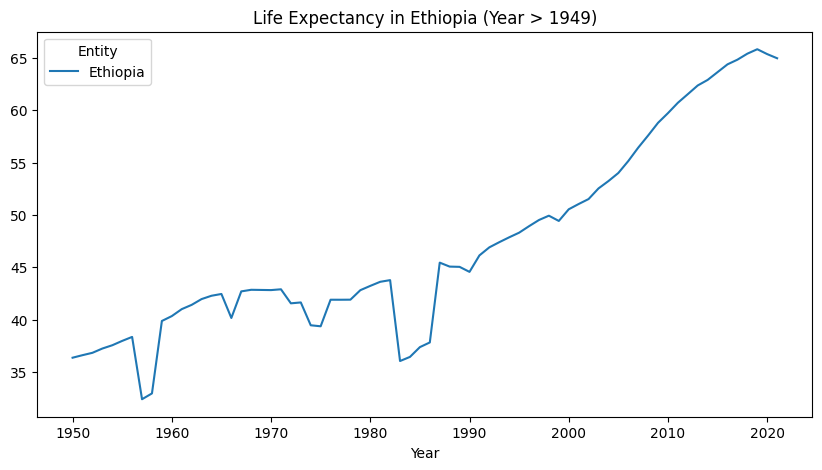

In [157]:
et=['Ethiopia']
df_ctr_et = df.query('Entity == @et & Year > 1949').pivot(index='Year', columns='Entity', values='LifeExpectancy')
df_ctr_et.plot(legend=True, figsize=(10, 5))
plt.title("Life Expectancy in Ethiopia (Year > 1949)") 

1974 – 1991: Derg Regime and Civil War

    1977-1978: The Red Terror campaign led to mass killings, repression, and instability.

    1984-1985: Ethiopian Famine caused by drought and government policies killed an estimated 1 million people.

    Ongoing Civil War: Armed conflicts between the Derg and rebel groups (such as the Tigray People’s Liberation Front (TPLF) and Eritrean People's Liberation Front (EPLF)) worsened living conditions.

1991 – 2000: Transition to Stability

    1991: The Derg was overthrown, and the Ethiopian People’s Revolutionary Democratic Front (EPRDF) took power.